In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set_ = training_data.iloc[:,1].values

In [4]:
training_set_

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [5]:
training_set_.shape

(1258,)

In [6]:
training_set = training_data.iloc[:,1:2].values

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
training_set.shape

(1258, 1)

### The training_set_ is a vector with shape (1258, ) but we need numpy array as the input to keras so we are making use of the upperbound exceptions in iloc python function to make it into array.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
norm_train_set = scaler.fit_transform(training_set)
norm_train_set.shape

(1258, 1)

In [11]:
# Training on 60 timesteps and 1 output

A_train = []
Z_train = []

for i in range(60,1258):
    A_train.append(norm_train_set[i-60:i, 0])
    Z_train.append(norm_train_set[i, 0])
    
A_train , Z_train = np.array(A_train), np.array(Z_train)

In [12]:
A_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
A_train.shape

(1198, 60)

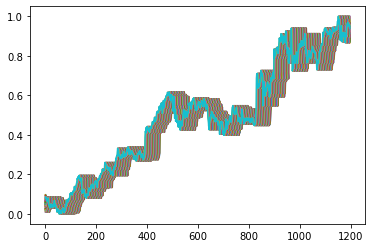

In [15]:
plt.plot(A_train)
plt.show()

In [16]:
# Reshaping the input 

A_train = np.reshape(A_train, (A_train.shape[0], A_train.shape[1], 1))

In [17]:
A_train.shape

(1198, 60, 1)

In [18]:
%pylab
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


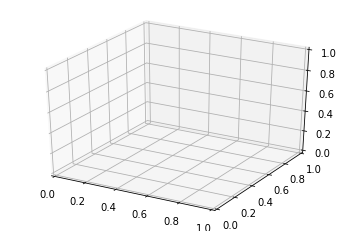

In [19]:
fig = plt.figure()
ax = subplot(projection='3d')

In [20]:
x = A_train[0].flatten()
y = A_train[1].flatten()
z = A_train[2].flatten()

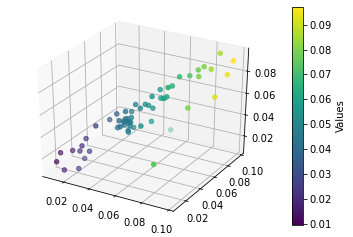

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(x,y,z,c=x,marker = 'o')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Values")
plt.show()

In [22]:
rnn = tf.keras.models.Sequential()

In [23]:
rnn.add(tf.keras.layers.LSTM(units=100, return_sequences=True, input_shape=(A_train.shape[1], 1)))
rnn.add(tf.keras.layers.Dropout(0.2))

In [24]:
rnn.add(tf.keras.layers.LSTM(units=100, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [25]:
rnn.add(tf.keras.layers.LSTM(units=100, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [26]:
rnn.add(tf.keras.layers.LSTM(units=150, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [27]:
rnn.add(tf.keras.layers.LSTM(units=150, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [28]:
rnn.add(tf.keras.layers.LSTM(units=100))
rnn.add(tf.keras.layers.Dropout(0.2))

In [29]:
rnn.add(tf.keras.layers.Dense(units=1))

In [30]:
rnn.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
rnn.fit(A_train, Z_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 342ms/step - loss: 0.0593
Epoch 2/100
38/38 [==============================] - 13s 332ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 13s 331ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 13s 332ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 13s 333ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 13s 336ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 13s 331ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 13s 339ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 13s 332ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 12s 327ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 13s 330ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 12s 325ms/step - loss: 0.0036
E

In [32]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [33]:
dataset = pd.concat((training_data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset[len(dataset) - len(dataset_test) - 60 : ].values
inputs = inputs.reshape(-1, 1)       #reshape is np function unless we add .values above line its pd df!!
inputs = scaler.transform(inputs)

In [34]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [35]:
inputs.shape

(80, 1)

In [36]:
X_test.shape

(20, 60)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [38]:
predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [39]:
predicted_stock_price

array([[770.6893 ],
       [767.97485],
       [769.84705],
       [771.1495 ],
       [774.5343 ],
       [780.5953 ],
       [784.29114],
       [783.9893 ],
       [783.61255],
       [783.6242 ],
       [783.7225 ],
       [783.5142 ],
       [783.3082 ],
       [784.0904 ],
       [785.019  ],
       [791.22394],
       [798.18164],
       [804.4088 ],
       [805.6418 ],
       [797.848  ]], dtype=float32)

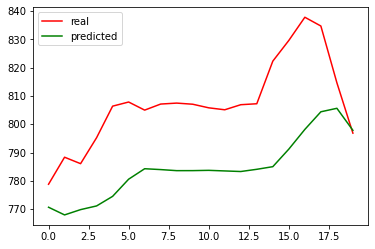

In [40]:
plt.plot(real_stock_price, color='red', label='real')
plt.plot(predicted_stock_price, color='green', label='predicted')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
rmse = np.sqrt(mse(real_stock_price, predicted_stock_price))
rmse

25.15237532238123

In [47]:
max_ = real_stock_price.max()
min_ = real_stock_price.min()
range_ = max_ - min_ 
abs_error = rmse / range_
abs_error

0.42631144614205474

In [48]:
range_

59.0